In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import functions as fxn
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky


In [4]:
strange_obj = pd.read_csv("strange.csv")

cone = pd.read_csv('cone.csv')
cone["ABSmag"] = cone['GAIAG'] + (5*np.log10(cone['PARALLAX']/100.))
cone["GAIA_GR"] = cone['GAIAG'] - cone['GAIARP']

secondary = pd.read_csv("secondary_matches.csv")

In [3]:
df_secondary = secondary.copy()
df_secondary = df_secondary.drop(columns= "Unnamed: 0")
df_secondary['ABSmag'] = df_secondary['GAIAG'] + (5*np.log10(df_secondary['PARALLAX']/100.))
df_secondary['GAIA_GR'] = df_secondary['GAIAG'] - df_secondary['GAIARP']

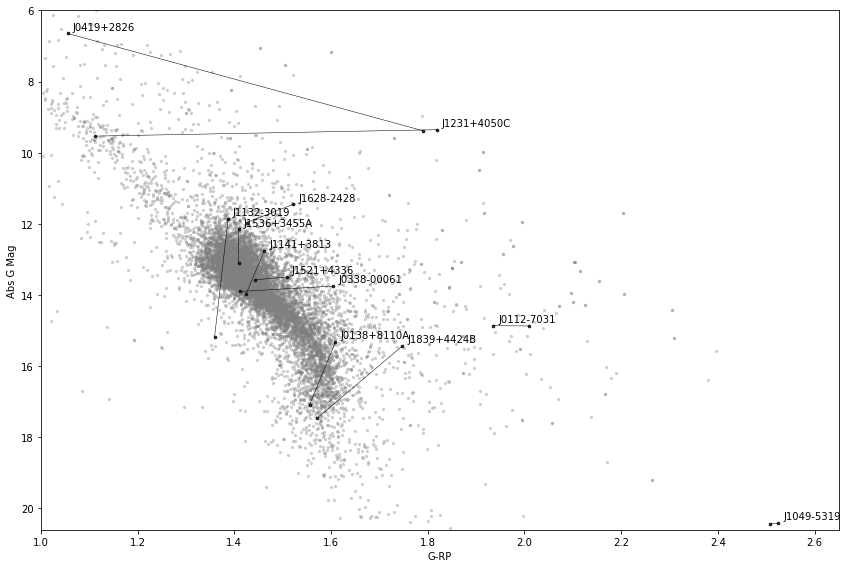

In [5]:
fig = plt.figure(figsize=(12,8))

cone = cone[cone['GAIATOG'] > 0 ]
plt.scatter(cone['GAIA_GR'], cone['ABSmag'], color = 'grey', alpha = 0.3, s= 5)

for i in range(len(strange_obj)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(strange_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(strange_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_R.append(strange_obj.iloc[i]['GAIA_GR'])
            G_R.append(df_secondary.iloc[j]['GAIA_GR'])
    plt.plot(G_R, absG, color = 'black',linestyle = '-', linewidth = 0.5, label = 'Binary System')
    plt.scatter(G_R,absG, color= 'black', alpha = 0.75, s = 7)


#plt.scatter(sec_GR, sec_abs, color = 'grey', alpha = 0.5, s= 5)

plt.xlabel("G-RP")
plt.ylabel("Abs G Mag")
plt.xlim(1.00, 2.65)
plt.ylim(6,20.6)
plt.gca().invert_yaxis()
for i in range(len(strange_obj)):
    name = f"{strange_obj.SHORTNAME.to_list()[i]}"
    plt.annotate(name, 
                (strange_obj.GAIA_GR.to_list()[i]+0.01,
                strange_obj.ABSmag.to_list()[i]-0.1))

plt.tight_layout()
plt.savefig('strange.png')
plt.show()

In [6]:
iso = pd.read_csv("isochrones.csv")


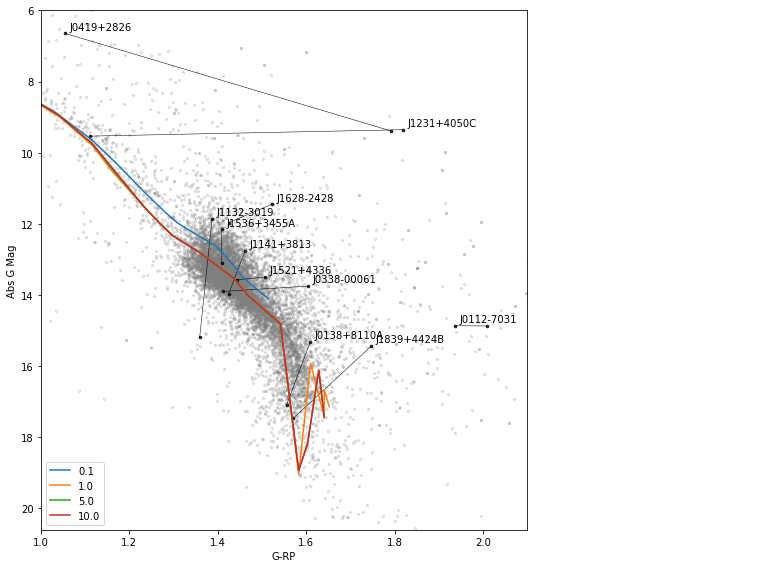

In [6]:
fig = plt.figure(figsize=(12,8))

cone = cone[cone['GAIATOG'] > 0 ]
plt.scatter(cone['GAIA_GR'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5)

for i in range(len(strange_obj)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(strange_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(strange_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_R.append(strange_obj.iloc[i]['GAIA_GR'])
            G_R.append(df_secondary.iloc[j]['GAIA_GR'])
    plt.plot(G_R, absG, color = 'black',linestyle = '-', linewidth = 0.5)
    plt.scatter(G_R,absG, color= 'black', alpha = 0.75, s = 7)




plt.xlabel("G-RP")
plt.ylabel("Abs G Mag")
plt.xlim(1.00, 2.1)
plt.ylim(6,20.6)

for i in range(len(strange_obj)):
    name = f"{strange_obj.SHORTNAME.to_list()[i]}"
    plt.annotate(name, 
                (strange_obj.GAIA_GR.to_list()[i]+0.01,
                strange_obj.ABSmag.to_list()[i]-0.1))



ages = [0.0005,0.1, 1.0, 5.0, 10.0]
mass = list(set(iso['M/Ms']))
for age in ages:
    age_data = iso[iso['t(Gyrs)'] == age]
    age_data = age_data[age_data['M/Ms'] < 0.8]
    age_data = age_data[age_data['M/Ms'] > 0.05]
    abs= age_data['G']
    g_rp = age_data['G'] - age_data['G_RP']
    sns.lineplot(y = abs, x = g_rp, label = age)

plt.gca().invert_yaxis()
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.savefig('isochrones.png')
plt.show()

# Check for HR diagram


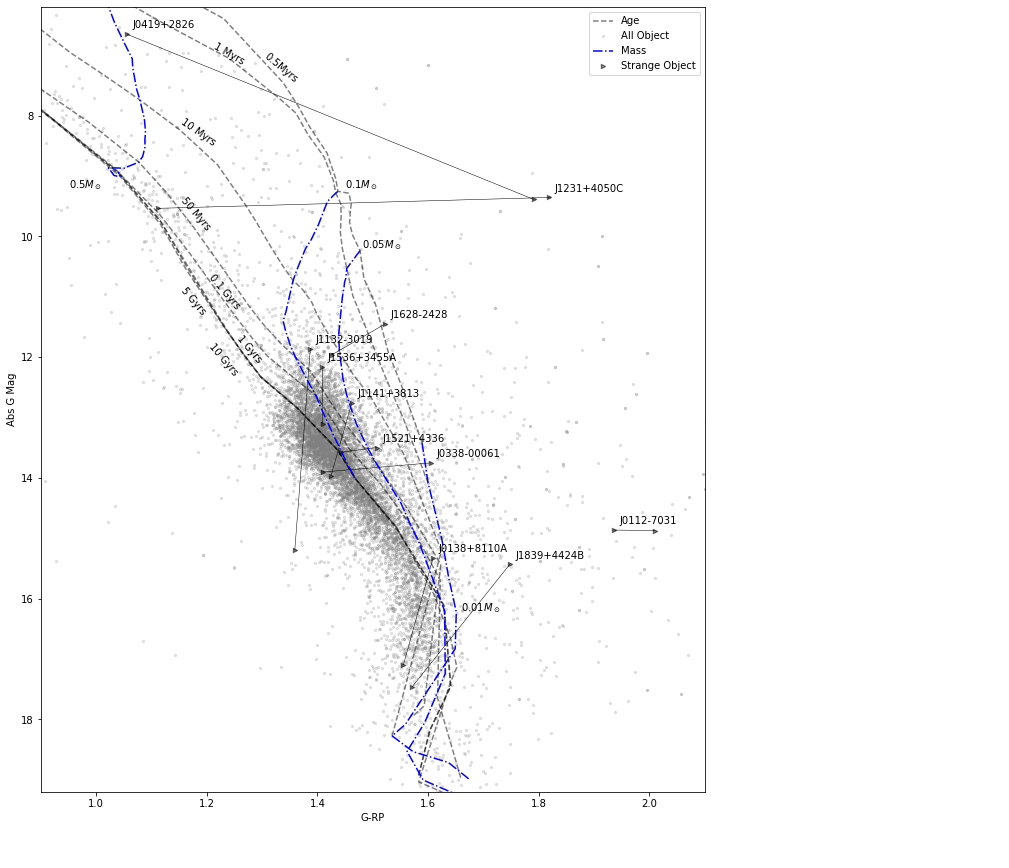

In [14]:
iso = pd.read_csv('isochrones.csv')
iso['g_grp'] = iso['G'] - iso['G_RP']
 
fig,ax = plt.subplots(1,1,figsize=(15,12))

cone = cone[cone['GAIATOG'] > 0 ]
ax.scatter(cone['GAIA_GR'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5, label= 'All Object')

for i in range(len(strange_obj)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(strange_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(strange_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_R.append(strange_obj.iloc[i]['GAIA_GR'])
            G_R.append(df_secondary.iloc[j]['GAIA_GR'])
    ax.plot(G_R, absG, color = 'black',linestyle = '-', linewidth = 0.5)
    ax.scatter(G_R,absG, marker = '>',color= 'black', alpha = 0.5, s = 20, label = 'Strange Object')

 

for i in range(len(strange_obj)):
    name = f"{strange_obj.SHORTNAME.to_list()[i]}"
    ax.annotate(name, 
                (strange_obj.GAIA_GR.to_list()[i]+0.01, 
                strange_obj.ABSmag.to_list()[i]-0.1))



ages = [0.0005, 0.001, 0.01,0.05,0.1, 1.0, 5.0, 10.0]
mass = list(set(iso['M/Ms']))
for age in ages:
    age_data = iso[iso['t(Gyrs)'] == age]
    ax.plot(age_data['g_grp'],age_data['G'],
            color = 'black',
            linestyle = "--",
            alpha = 0.5, label = 'Age')

ax.annotate('0.5Myrs', (1.30, 7.45), rotation = -40)
ax.annotate('1 Myrs', (1.21, 7.15), rotation = -30)
ax.annotate('10 Myrs', (1.15, 8.5), rotation = -35)
ax.annotate('50 Myrs', (1.15, 9.9), rotation = -50)
ax.annotate('0.1 Gyrs', (1.20, 11.2), rotation = -50)
ax.annotate('1 Gyrs', (1.25, 12.1), rotation = -50)
ax.annotate('5 Gyrs', (1.15, 11.3), rotation = -50)
ax.annotate('10 Gyrs', (1.2, 12.3), rotation = -50)



masses = [0.01,0.05,0.1,0.5]

for mass in masses:
    age_data = iso[iso['M/Ms'] == mass]
    ax.plot(age_data['g_grp'],age_data['G'],
            color = 'blue',
            linestyle = '-.', label = 'Mass')
    name = f"{mass}$M_\odot$"


ax.annotate("0.1$M_\odot$", (1.45,9.2))
ax.annotate("0.5$M_\odot$", (0.95,9.2))
ax.annotate("0.05$M_\odot$", (1.48, 10.2))
ax.annotate("0.01$M_\odot$", (1.66, 16.2))


ax.set_xlabel("G-RP")
ax.set_ylabel("Abs G Mag")
ax.set_xlim(0.90, 2.1)
ax.set_ylim(6.2,19.2 )
ax.invert_yaxis()  

handles, labels = ax.get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')
plt.tight_layout()
plt.savefig("HRisochrones.png")
plt.show()   

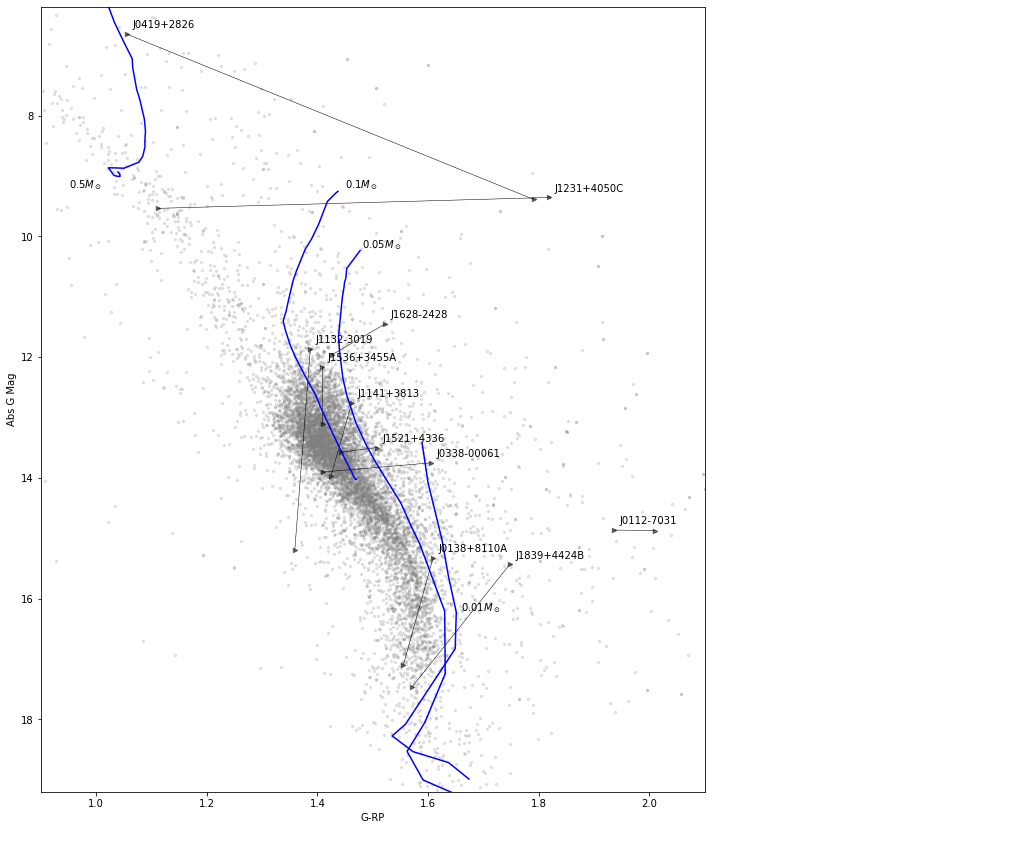

In [18]:
fig,ax = plt.subplots(1,1,figsize=(15,12))


cone = cone[cone['GAIATOG'] > 0 ]
ax.scatter(cone['GAIA_GR'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5, label= 'All Object')

for i in range(len(strange_obj)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(strange_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(strange_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_R.append(strange_obj.iloc[i]['GAIA_GR'])
            G_R.append(df_secondary.iloc[j]['GAIA_GR'])
    ax.plot(G_R, absG, color = 'black',linestyle = '-', linewidth = 0.5)
    ax.scatter(G_R,absG, marker = '>',color= 'black', alpha = 0.5, s = 20, label = 'Strange Object')

 

for i in range(len(strange_obj)):
    name = f"{strange_obj.SHORTNAME.to_list()[i]}"
    ax.annotate(name, 
                (strange_obj.GAIA_GR.to_list()[i]+0.01, 
                strange_obj.ABSmag.to_list()[i]-0.1))


masses = [0.01, 0.05,0.1,0.5]

for mass in masses:
    age_data = iso[iso['M/Ms'] == mass]
    ax.plot(age_data['g_grp'],age_data['G'],
            color = 'blue',
            linestyle = '-', label = 'Mass')
    name = f"{mass}$M_\odot$"
    

ax.annotate("0.1$M_\odot$", (1.45,9.2))
ax.annotate("0.5$M_\odot$", (0.95,9.2))
ax.annotate("0.05$M_\odot$", (1.48, 10.2))
ax.annotate("0.01$M_\odot$", (1.66, 16.2))

ax.set_xlabel("G-RP")
ax.set_ylabel("Abs G Mag")
ax.set_xlim(0.90, 2.1)
ax.set_ylim(6.2,19.2 )
ax.invert_yaxis()   
handles, labels = ax.get_legend_handles_labels()
plt.savefig("Mass.png")
plt.tight_layout()

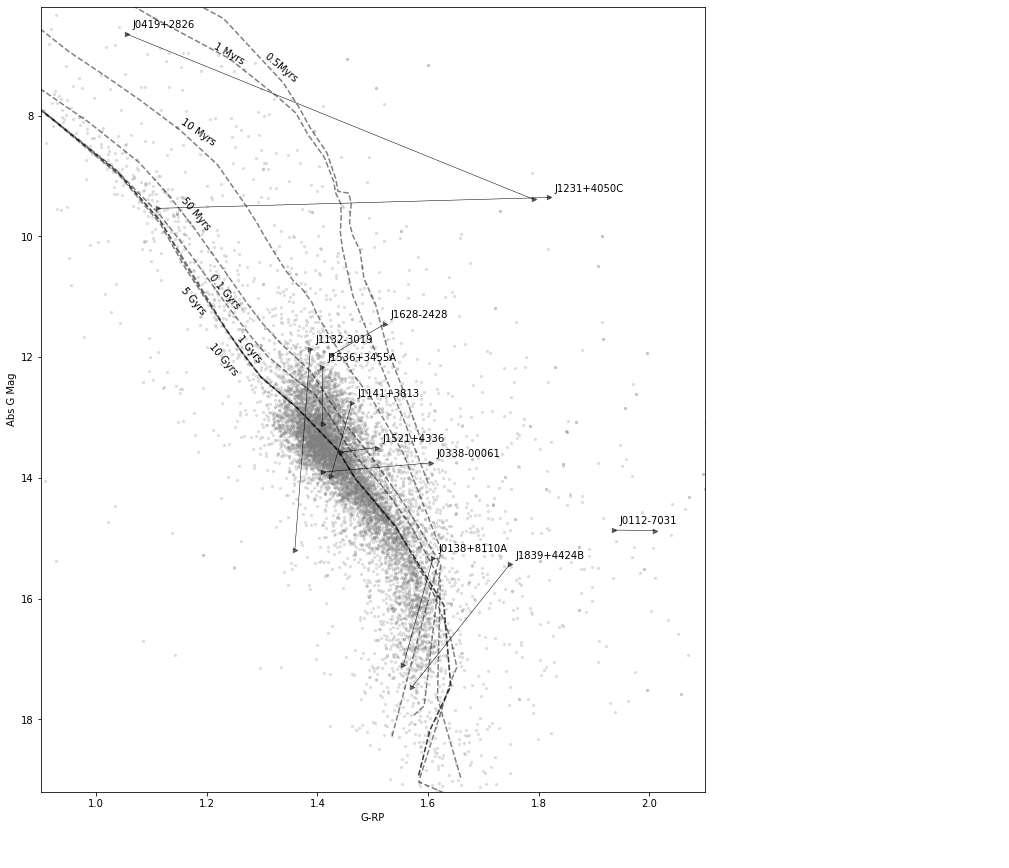

In [17]:
fig,ax = plt.subplots(1,1,figsize=(15,12))

ax.scatter(cone['GAIA_GR'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5, label= 'All Object')

for i in range(len(strange_obj)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(strange_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(strange_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_R.append(strange_obj.iloc[i]['GAIA_GR'])
            G_R.append(df_secondary.iloc[j]['GAIA_GR'])
    ax.plot(G_R, absG, color = 'black',linestyle = '-', linewidth = 0.5)
    ax.scatter(G_R,absG, marker = '>',color= 'black', alpha = 0.5, s = 20, label = 'Strange Object')

 

for i in range(len(strange_obj)):
    name = f"{strange_obj.SHORTNAME.to_list()[i]}"
    ax.annotate(name, 
                (strange_obj.GAIA_GR.to_list()[i]+0.01, 
                strange_obj.ABSmag.to_list()[i]-0.1))



ages = [0.0005, 0.001, 0.01,0.05,0.1, 1.0, 5.0, 10.0]
mass = list(set(iso['M/Ms']))
for age in ages:
    age_data = iso[iso['t(Gyrs)'] == age]
    ax.plot(age_data['g_grp'],age_data['G'],
            color = 'black',
            linestyle = "--",
            alpha = 0.5, label = 'Age')

ax.annotate('0.5Myrs', (1.30, 7.45), rotation = -40)
ax.annotate('1 Myrs', (1.21, 7.15), rotation = -30)
ax.annotate('10 Myrs', (1.15, 8.5), rotation = -35)
ax.annotate('50 Myrs', (1.15, 9.9), rotation = -50)
ax.annotate('0.1 Gyrs', (1.20, 11.2), rotation = -50)
ax.annotate('1 Gyrs', (1.25, 12.1), rotation = -50)
ax.annotate('5 Gyrs', (1.15, 11.3), rotation = -50)
ax.annotate('10 Gyrs', (1.2, 12.3), rotation = -50)

ax.set_xlabel("G-RP")
ax.set_ylabel("Abs G Mag")
ax.set_xlim(0.90, 2.1)
ax.set_ylim(6.2,19.2 )
ax.invert_yaxis()   
handles, labels = ax.get_legend_handles_labels()
plt.savefig("age.png")
plt.tight_layout()
plt.show()

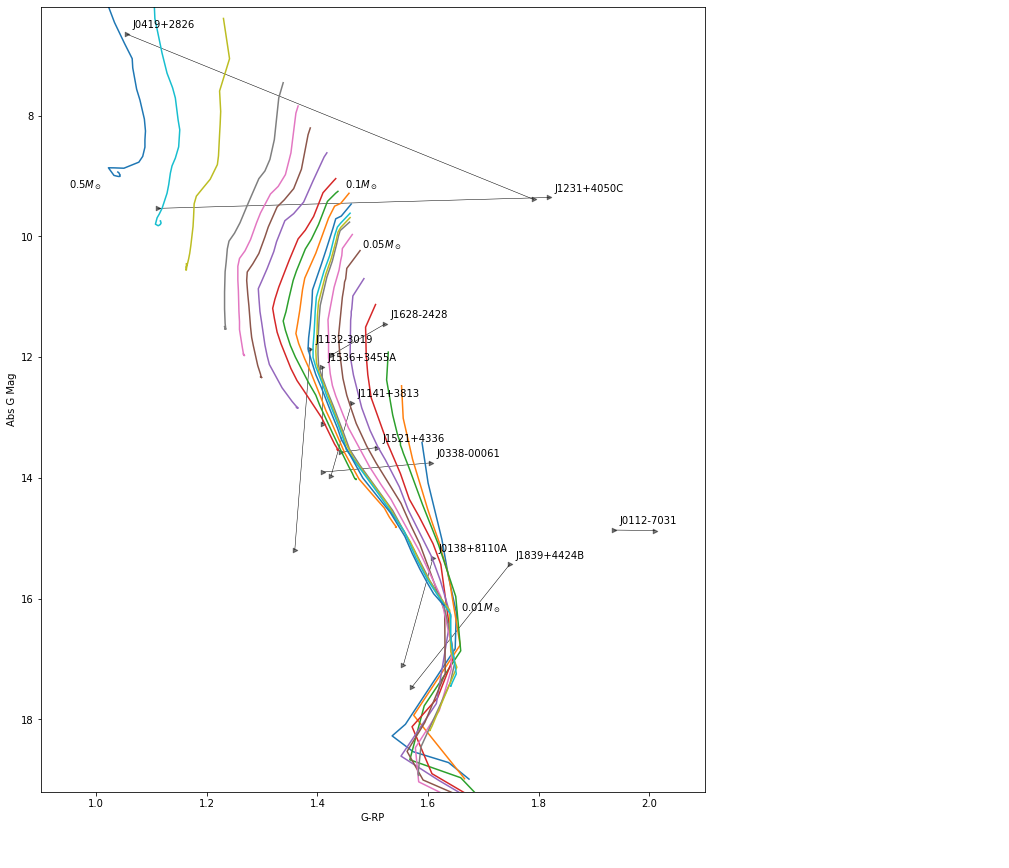

In [22]:
fig,ax = plt.subplots(1,1,figsize=(15,12))


cone = cone[cone['GAIATOG'] > 0 ]
#ax.scatter(cone['GAIA_GR'], cone['ABSmag'], color = 'grey', alpha = 0.2, s= 5, label= 'All Object')

for i in range(len(strange_obj)):
    absG =[]
    G_R = []
    sec_obj = fxn.Converttolist(strange_obj.iloc[i]['COMPANIONS'])
    for j in range(len(df_secondary)):
        if df_secondary.iloc[j]['SHORTNAME'].strip() in sec_obj:
            absG.append(strange_obj.iloc[i]['ABSmag'])
            absG.append(df_secondary.iloc[j]['ABSmag'])
            G_R.append(strange_obj.iloc[i]['GAIA_GR'])
            G_R.append(df_secondary.iloc[j]['GAIA_GR'])
    ax.plot(G_R, absG, color = 'black',linestyle = '-', linewidth = 0.5)
    ax.scatter(G_R,absG, marker = '>',color= 'black', alpha = 0.5, s = 20, label = 'Strange Object')

 

for i in range(len(strange_obj)):
    name = f"{strange_obj.SHORTNAME.to_list()[i]}"
    ax.annotate(name, 
                (strange_obj.GAIA_GR.to_list()[i]+0.01, 
                strange_obj.ABSmag.to_list()[i]-0.1))


masses = [0.01,0.015,0.02, 0.03,0.04,0.05, 0.06, 0.07,
        0.07200000000000001, 0.075, 0.08, 0.09, 0.1, 
        0.11, 0.13, 0.15, 0.17, 0.2, 0.3, 0.4, 0.5,]

for mass in masses:
    age_data = iso[iso['M/Ms'] == mass]
    ax.plot(age_data['g_grp'],age_data['G'],
            linestyle = '-', label = mass)
    name = f"{mass}$M_\odot$"
    

ax.annotate("0.1$M_\odot$", (1.45,9.2))
ax.annotate("0.5$M_\odot$", (0.95,9.2))
ax.annotate("0.05$M_\odot$", (1.48, 10.2))
ax.annotate("0.01$M_\odot$", (1.66, 16.2))

ax.set_xlabel("G-RP")
ax.set_ylabel("Abs G Mag")
ax.set_xlim(0.90, 2.1)
ax.set_ylim(6.2,19.2 )
ax.invert_yaxis()   
handles, labels = ax.get_legend_handles_labels()
plt.savefig("Massall.svg")
plt.tight_layout()